In [1]:
import io
from PIL import Image
import ipywidgets as widgets
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [2]:
uploader = widgets.FileUpload(multiple=True)
display(uploader)

FileUpload(value=(), description='Upload', multiple=True)

In [16]:
imported_images = []

for file in uploader.value:
    
    #imported_images.append(Image.open(io.BytesIO(file['content'])))
    
    file_bytes = np.asarray(bytearray(file['content']), dtype=np.uint8)
    opencv_image = cv2.imdecode(file_bytes, 1)
    opencv_image = cv2.cvtColor(opencv_image,cv2.COLOR_BGR2RGB) # Color from BGR to RGB
    imported_images.append(opencv_image)

model_path = "../models/cnn-xr-91.h5"
model = load_model(model_path, compile=False)

In [17]:
def make_prediction(image, model, index):
    # Make prediction
    x = cv2.resize(image,(128,128))
    x = np.expand_dims(x,axis=0)    
    y = model.predict(x)
    ans = np.argmax(y,axis=1)

    # Print output
    if(ans==0):
        out = widgets.HTML(f'# Image {index} Result: COVID')
    elif(ans==1):
        out = widgets.HTML(f'# Image {index} Result: Healthy')
    else:
        out = widgets.HTML(f'# Image {index} Result: Misc. Pulmonary Disorder')
        
    disp_image = widgets.Image()
    
    return (out, disp_image)

1/1 [==============================] - 0s 76ms/step


HTML(value='# Image 1 Result: Healthy')

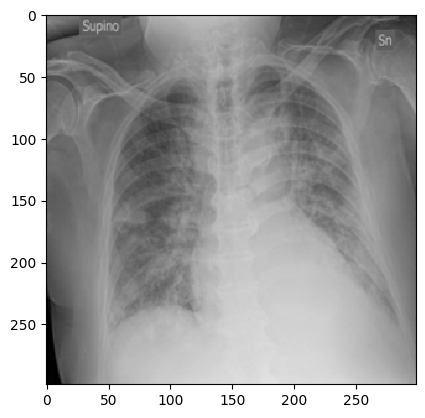

1/1 [==============================] - 0s 21ms/step


HTML(value='# Image 2 Result: COVID')

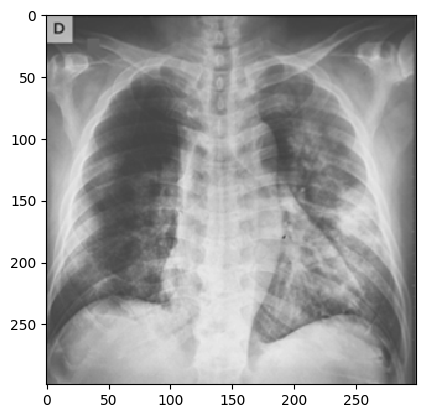

1/1 [==============================] - 0s 22ms/step


HTML(value='# Image 3 Result: COVID')

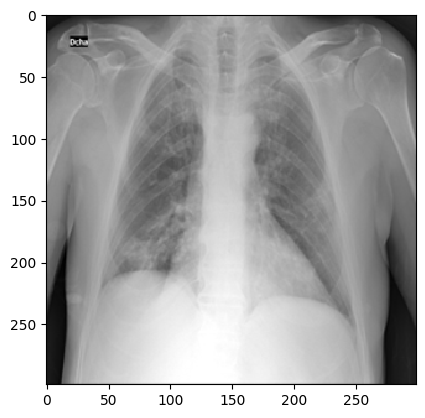

1/1 [==============================] - 0s 21ms/step


HTML(value='# Image 4 Result: Healthy')

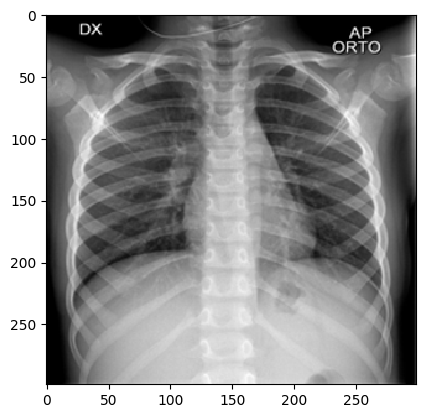

1/1 [==============================] - 0s 23ms/step


HTML(value='# Image 5 Result: COVID')

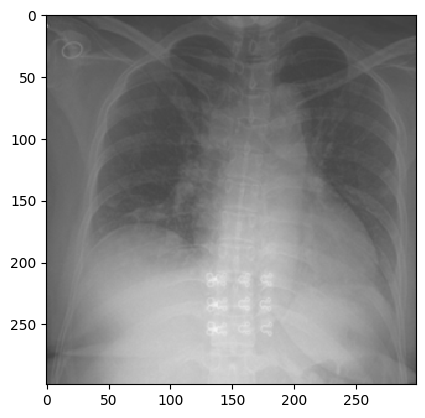

1/1 [==============================] - 0s 20ms/step


HTML(value='# Image 6 Result: COVID')

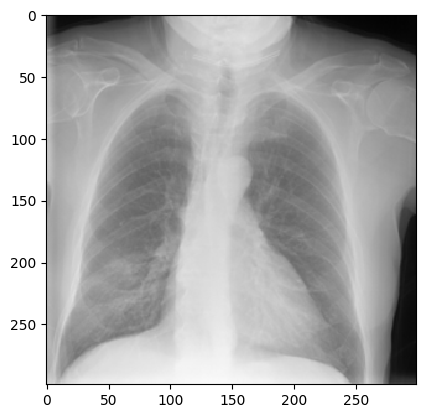

1/1 [==============================] - 0s 19ms/step


HTML(value='# Image 7 Result: Healthy')

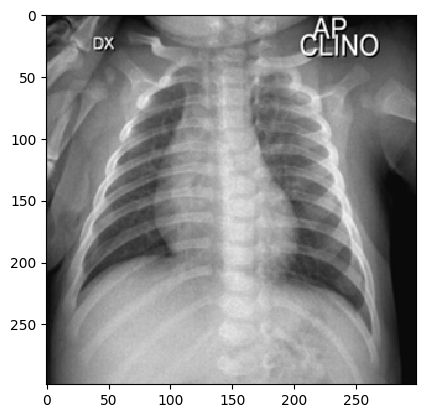

1/1 [==============================] - 0s 21ms/step


HTML(value='# Image 8 Result: COVID')

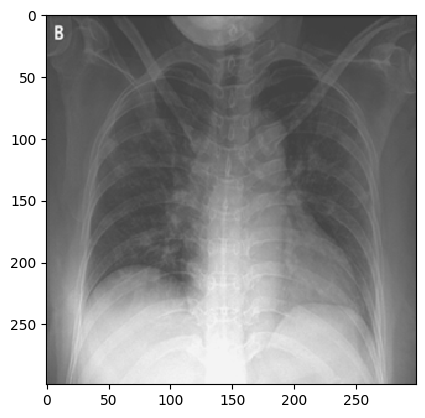

1/1 [==============================] - 0s 19ms/step


HTML(value='# Image 9 Result: COVID')

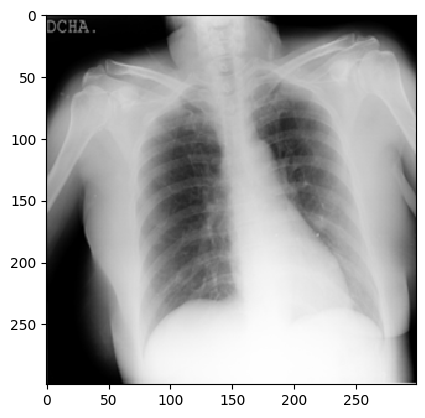

In [18]:
for index in range(0, len(imported_images)):
    img = imported_images[index]
    out, disp_image = make_prediction(img, model, index+1)
    display(out)
    plt.imshow(img, interpolation='nearest')
    plt.show()